#Importing all the modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load and inspect dataset

In [2]:
data_path = "/content/Data-Melbourne_F.csv"
data = pd.read_csv(data_path)
print(data.head())

   avg_outflow  avg_inflow  total_grid  Ammonia    BOD     COD  \
0        2.941       2.589      175856     27.0  365.0   730.0   
1        2.936       2.961      181624     25.0  370.0   740.0   
2        2.928       3.225      202016     42.0  418.0   836.0   
3        2.928       3.354      207547     36.0  430.0   850.0   
4        2.917       3.794      202824     46.0  508.0  1016.0   

   Total Nitrogen  avg_Temperature  max_Temp  min_Temperature  \
0          60.378             19.3      25.1             12.6   
1          60.026             17.1      23.6             12.3   
2          64.522             16.8      27.2              8.8   
3          63.000             14.6      19.9             11.1   
4          65.590             13.4      19.1              8.0   

   Atmospheric Pressure  avg_Humidity  Total_Rainfall  avg_visibility  \
0                   0.0            56            1.52            10.0   
1                   0.0            63            0.00            1

# Check for null values

In [3]:
print("Null values per column:\n", data.isnull().sum())

Null values per column:
 avg_outflow             0
avg_inflow              0
total_grid              0
Ammonia                 0
BOD                     0
COD                     0
Total Nitrogen          0
avg_Temperature         0
max_Temp                0
min_Temperature         0
Atmospheric Pressure    0
avg_Humidity            0
Total_Rainfall          0
avg_visibility          0
avg_visibility.1        0
avg_wind_speed          0
Maximum_wind_speed      0
year                    0
month                   0
day                     0
dtype: int64


# Visualizing correlations

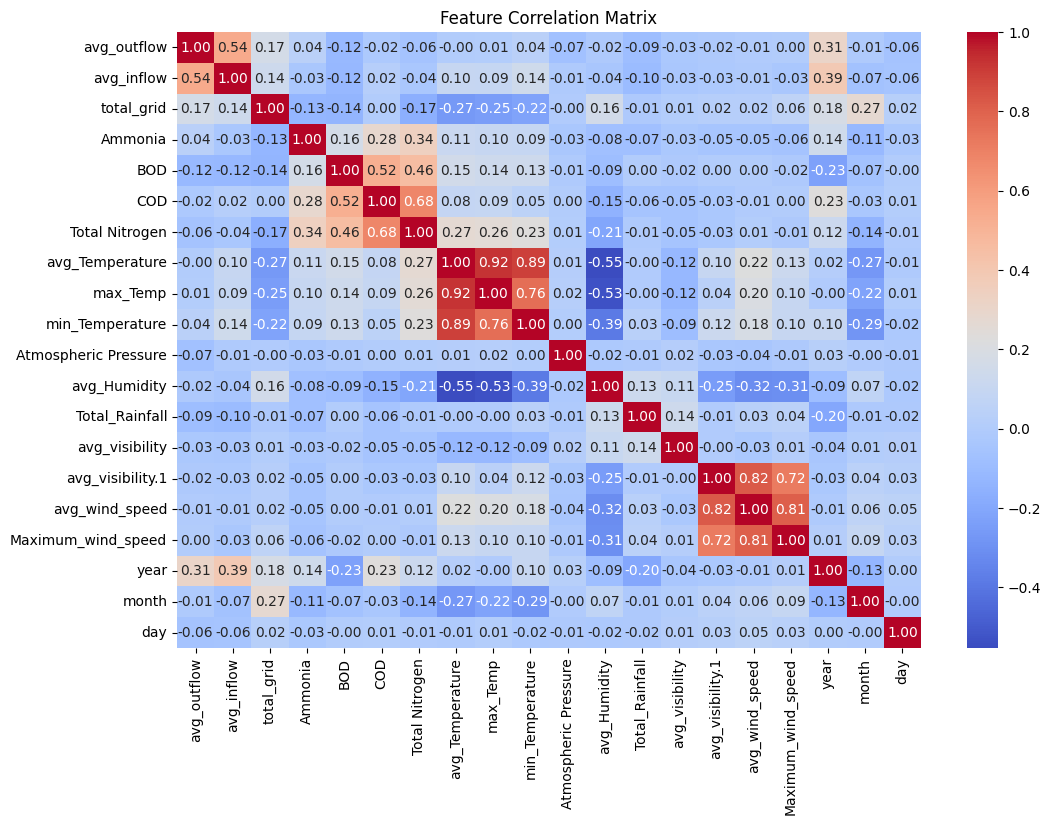

In [4]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Data preprocessing

In [5]:
features = data.drop(columns=['COD'])
target = (data['COD'] <= 800).astype(int)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Custom logistic regression implementation

In [6]:
class SimpleLogisticModel:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def initialize_weights(self, n):
        return np.zeros(n)

    def compute_loss_and_gradient(self, X, y, weights):
        predictions = self.sigmoid(np.dot(X, weights))
        m = len(y)
        loss = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        gradient = np.dot(X.T, (predictions - y)) / m
        return loss, gradient

    def train(self, X, y):
        num_features = X.shape[1]
        self.weights = self.initialize_weights(num_features)
        loss_history = []

        for i in range(self.iterations):
            loss, gradient = self.compute_loss_and_gradient(X, y, self.weights)
            self.weights -= self.learning_rate * gradient
            loss_history.append(loss)

            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.4f}")

        return loss_history

    def predict(self, X, threshold=0.5):
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return (probabilities >= threshold).astype(int)

# Train custom logistic regression model

In [12]:
cust_model = SimpleLogisticModel(learning_rate=0.01, iterations=5000)
loss_curve = cust_model.train(X_train, y_train)

Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.5945
Iteration 200: Loss = 0.5462
Iteration 300: Loss = 0.5163
Iteration 400: Loss = 0.4956
Iteration 500: Loss = 0.4804
Iteration 600: Loss = 0.4688
Iteration 700: Loss = 0.4595
Iteration 800: Loss = 0.4520
Iteration 900: Loss = 0.4458
Iteration 1000: Loss = 0.4406
Iteration 1100: Loss = 0.4362
Iteration 1200: Loss = 0.4323
Iteration 1300: Loss = 0.4290
Iteration 1400: Loss = 0.4260
Iteration 1500: Loss = 0.4234
Iteration 1600: Loss = 0.4211
Iteration 1700: Loss = 0.4191
Iteration 1800: Loss = 0.4172
Iteration 1900: Loss = 0.4155
Iteration 2000: Loss = 0.4140
Iteration 2100: Loss = 0.4126
Iteration 2200: Loss = 0.4113
Iteration 2300: Loss = 0.4102
Iteration 2400: Loss = 0.4091
Iteration 2500: Loss = 0.4081
Iteration 2600: Loss = 0.4072
Iteration 2700: Loss = 0.4063
Iteration 2800: Loss = 0.4055
Iteration 2900: Loss = 0.4048
Iteration 3000: Loss = 0.4041
Iteration 3100: Loss = 0.4035
Iteration 3200: Loss = 0.4029
Iteration 3300: Loss =

# Plot loss over iterations

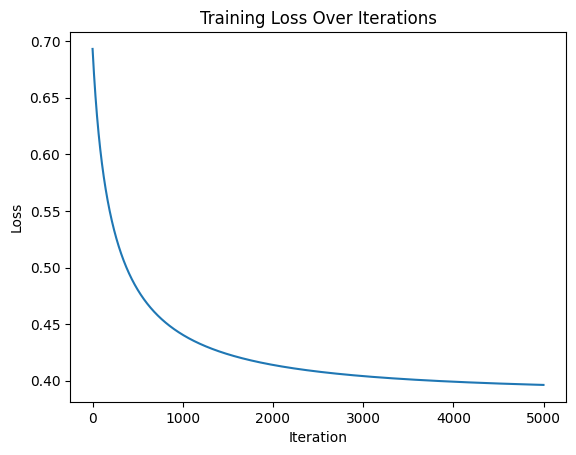

In [13]:
plt.plot(loss_curve)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Predictions and evaluation for custom logistic regression
 and LR with Scikitlearn , Decision tree Model, SVM

In [14]:
pred_cust = cust_model.predict(X_test)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
pred_knn = knn_model.predict(X_test)


dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
pred_dtree = dtree_model.predict(X_test)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)


svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
pred_svm = svm_model.predict(X_test)


# Function to evaluate models

In [15]:
def assess_model(model, X_eval, y_eval, name):
    pred = model.predict(X_eval)
    acc = accuracy_score(y_eval, pred)
    f1 = f1_score(y_eval, pred)
    cm = confusion_matrix(y_eval, pred)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass', 'Fail']).plot(cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

# Evaluating all models

Model: Custom Logistic Regression
Accuracy: 0.8412
F1 Score: 0.7944
Confusion Matrix:
[[148  38]
 [  6  85]]



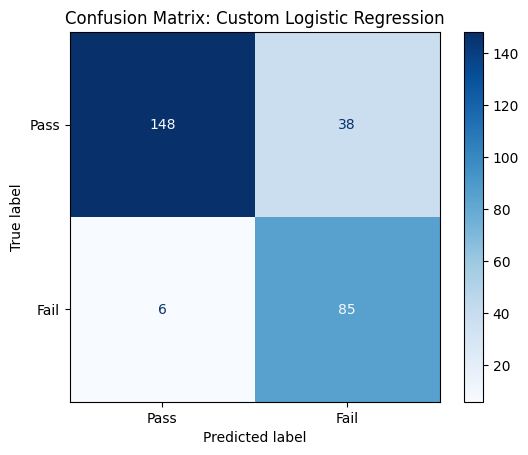

Model: Logistic Regression
Accuracy: 0.8736
F1 Score: 0.8148
Confusion Matrix:
[[165  21]
 [ 14  77]]



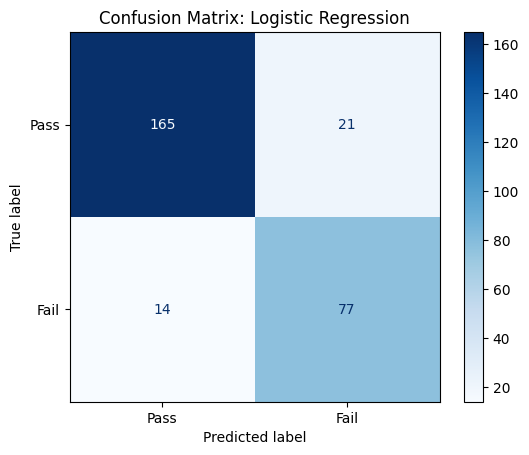

Model: K-Nearest Neighbor
Accuracy: 0.8159
F1 Score: 0.7273
Confusion Matrix:
[[158  28]
 [ 23  68]]



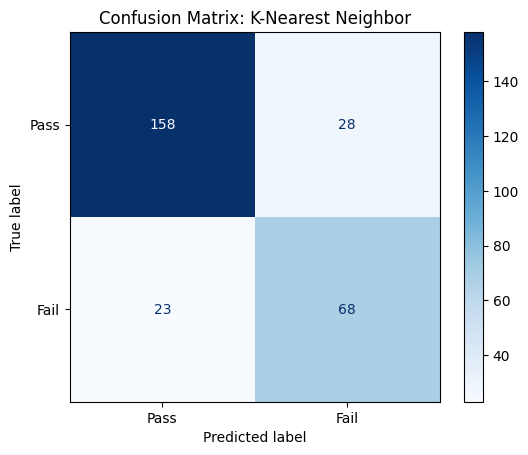

Model: Decisin Tree
Accuracy: 0.9206
F1 Score: 0.8817
Confusion Matrix:
[[173  13]
 [  9  82]]



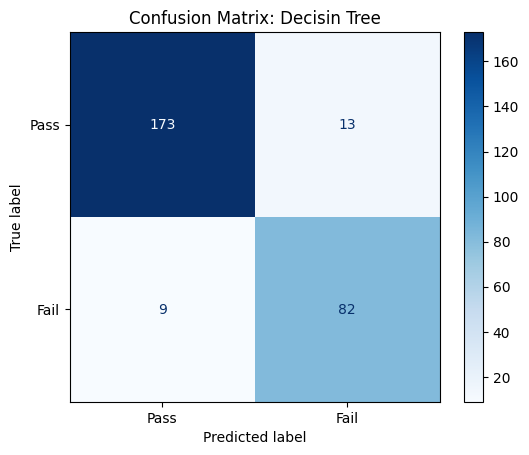

Model: Random Forest
Accuracy: 0.9314
F1 Score: 0.8995
Confusion Matrix:
[[173  13]
 [  6  85]]



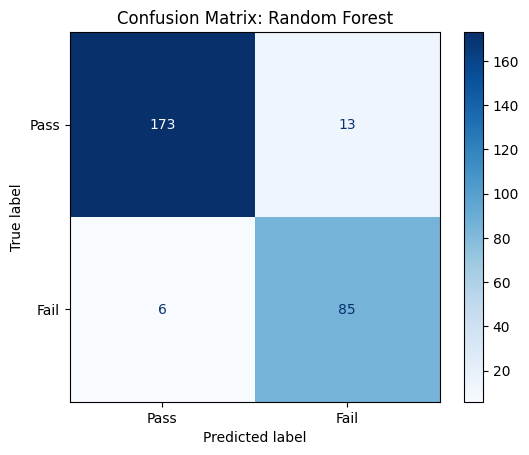

Model: SVM
Accuracy: 0.8953
F1 Score: 0.8528
Confusion Matrix:
[[164  22]
 [  7  84]]



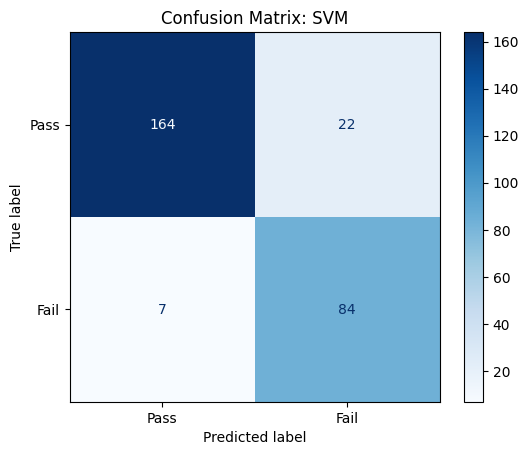

In [16]:
assess_model(cust_model, X_test, y_test, "Custom Logistic Regression")
assess_model(lr_model, X_test, y_test, "Logistic Regression")
assess_model(knn_model, X_test, y_test, "K-Nearest Neighbor")
assess_model(dtree_model, X_test, y_test, "Decisin Tree")
assess_model(rf_model, X_test, y_test, "Random Forest")
assess_model(svm_model, X_test, y_test, "SVM")